In [8]:
#Load Image, View, Save - OpenCV, PIL
import cv2
import numpy as np
image = cv2.imread('images/chicago.jpg', 1)
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/exam.jpg',image)

True

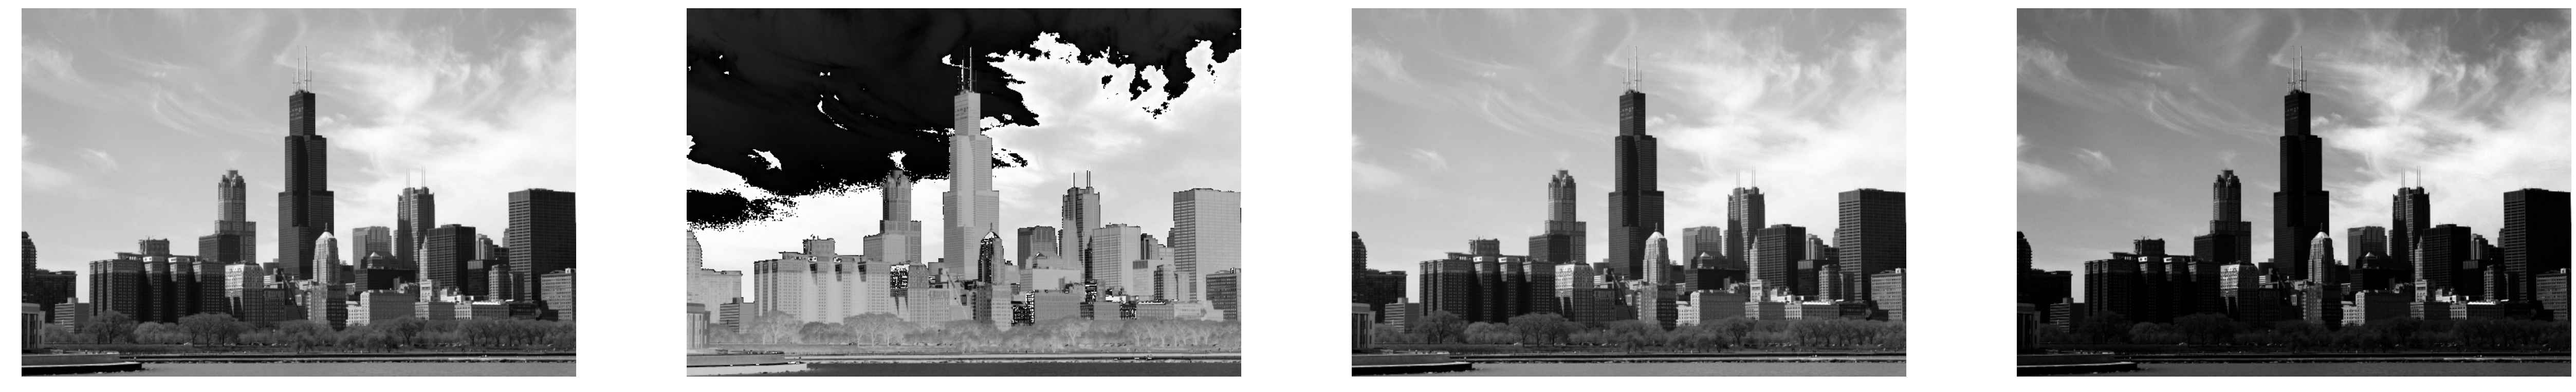

In [10]:
#Intensity Transformation
from PIL import Image
from pylab import *

ht = array(Image.open('images\chicago.jpg').convert('L'))
ht2 = 200 - ht #invert image
ht3 = (100.0/200) * ht + 100 #clamp to interval 100...200
ht4 = 255.0 * (ht/200.0)**2 #squared
fig, axs = subplots(1, 4, figsize=(64, 64))

axs[0].imshow(ht)
axs[0].axis('off')
axs[1].imshow(ht2)
axs[1].axis('off')
axs[2].imshow(ht3)
axs[2].axis('off')
axs[3].imshow(ht4)
axs[3].axis('off')

gray()
show()

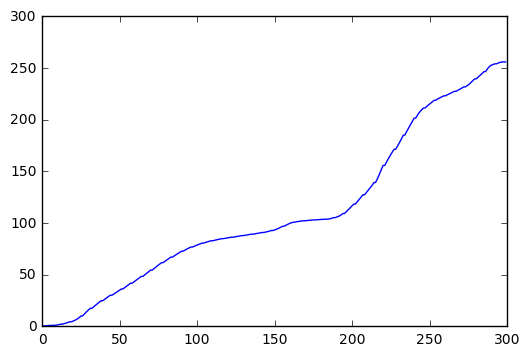

In [14]:
#Histogram Equalization
def histeq(ht,nbr_bins=300):
    """ Histogram equalization of a grayscale image. """
    
    # get image histogram
    imhist,bins = histogram(ht.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 256 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    ht2 = interp(ht.flatten(),bins[:-1],cdf)
    return ht2.reshape(ht.shape), cdf

ht2,cdf = histeq(ht)
figure()
plot(cdf)
show()

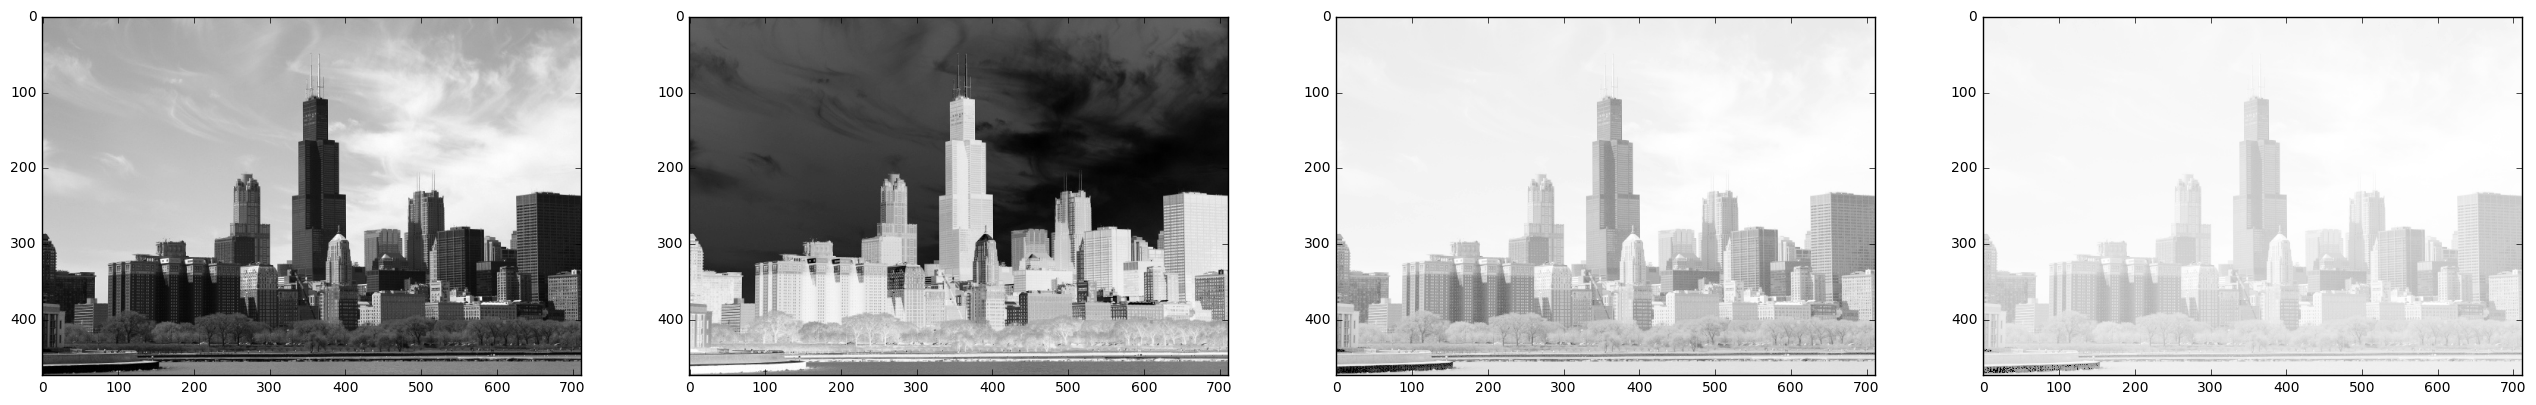

In [15]:
# Intensity Transform - Negative, Log, Gamma Transform
import sys
from PIL import Image
from pylab import *
from math import *
import cv2
import numpy as np

# import matplotlib.pyplot as pl
# read image to array
im = cv2.imread('images\chicago.jpg',0)
row,col=im.shape

negative=np.zeros((row,col))
for i in range (row):
    for j in range (col):
        negative[i][j]=255-im[i][j]
    
    #negative=uint8(negative)
log=np.zeros((row,col))
for i in range (row):
    for j in range (col):
        log[i][j]=50*log10(1+im[i][j])

#log=uint8(log)
gamma=np.zeros((row,col))
g=0.1
for i in range (row):
    for j in range (col):
        gamma[i][j]=50*pow(im[i][j],g)

#gamma=uint8(log)
fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(im)
axs[0].axis('on')
axs[1].imshow(negative)
axs[1].axis('on')
axs[2].imshow(log)
axs[2].axis('on')
axs[3].imshow(gamma)
axs[3].axis('on')
gray()
show()

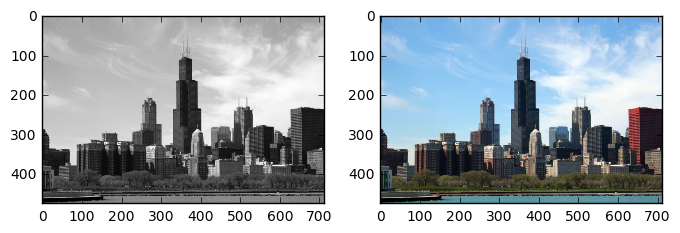

In [16]:
#Image Convolution - Average, Laplacian
Ave = array(Image.open('images/chicago.jpg'))
def compute_average(imlist):
    """ Compute the average of a list of images. """
    # open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print(imname + '...skipped')
    averageim /= len(imlist)
    # return average as uint8
    return array(averageim, 'uint8')

fig, axs = subplots(1, 2, figsize=(8, 8))
axs[0].imshow(im)
axs[0].axis('on')
axs[1].imshow(Ave)
axs[1].axis('on')
gray()
show()

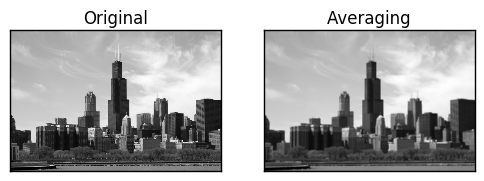

In [13]:
# Averaging Operation
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/chicago.jpg', 0)
blur = cv2.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
gray()
plt.show()

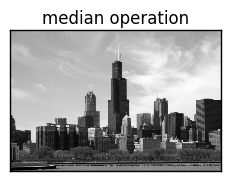

In [12]:
median = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('median operation')
plt.xticks([]), plt.yticks([])
gray()
plt.show()

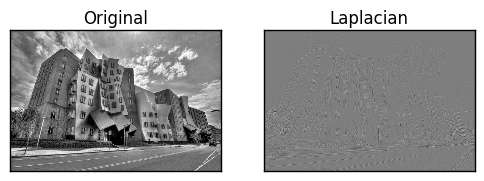

In [18]:
#Laplacian  Operation
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/stata.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import numpy as np
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
import matplotlib.pyplot as plt
fname = 'images/stata.jpg'
neighborhood_size = 5
threshold = 1500

data = scipy.misc.imread(fname)

data_max = filters.maximum_filter(data, neighborhood_size)
maxima = (data == data_max)
data_min = filters.minimum_filter(data, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
slices = ndimage.find_objects(labeled)
x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2    
    y.append(y_center)
plt.imshow(data)
plt.autoscale(False)
plt.plot(x,y, 'ro')